In [42]:
from Crypto.Util.number import getPrime, inverse, bytes_to_long, long_to_bytes, GCD
from Crypto.Hash.SHA256 import SHA256Hash
import random

# Prerequisites

- RSA Encryption/Decryption
- Modular arithmetic

# Theory

- https://www.youtube.com/watch?v=JR4_RBb8A9Q
- https://crypto.stackexchange.com/questions/9896/how-does-rsa-signature-verification-work

## Signatures

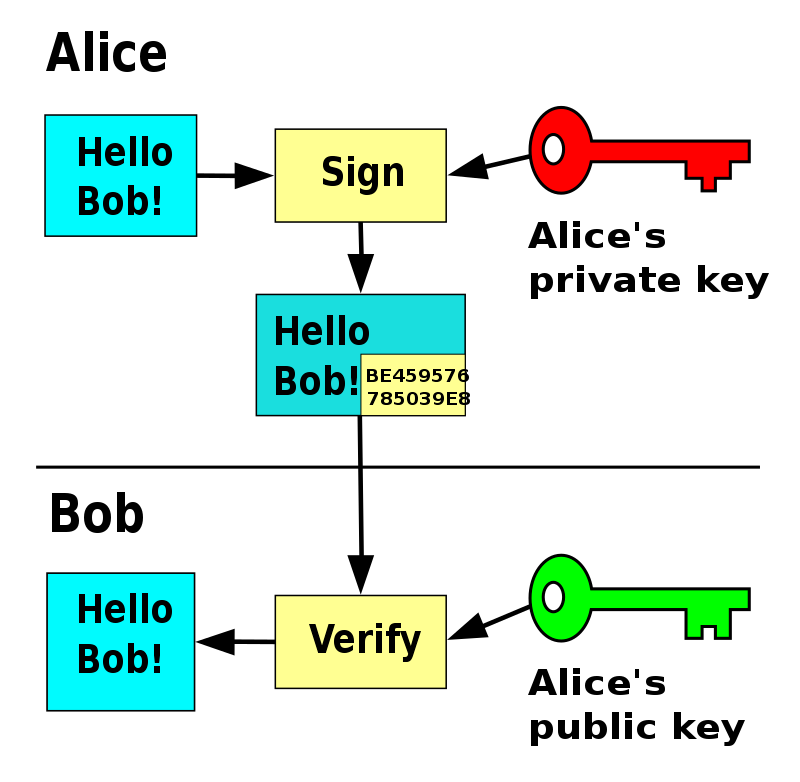

## RSADSA

Key creation (Samantha):
* Choose secret primes $p$ and$q$
* Choose verification exponent $e$ with $\gcd(e,(p−1)(q−1)) = 1$
*  Publish $N=pq$ and $e$.

Signing (Samantha):
* Compute $d$ satisfying $de≡1(mod(p−1)(q−1))$
* Sign document $D$ by computing $S≡D^d(modN)$
* Return $S$

Verification (Victor):
* $D \equiv S^e mod \ N$ 

*Proof*:  
$S^e≡D^{de}≡D(modN)$

## Hashing

Directly signing the document will lead to security issues. Therefore we usually hash algorithm on the document then sign the hash\

https://www.cs.cornell.edu/courses/cs5430/2015sp/notes/rsa_sign_vs_dec.php

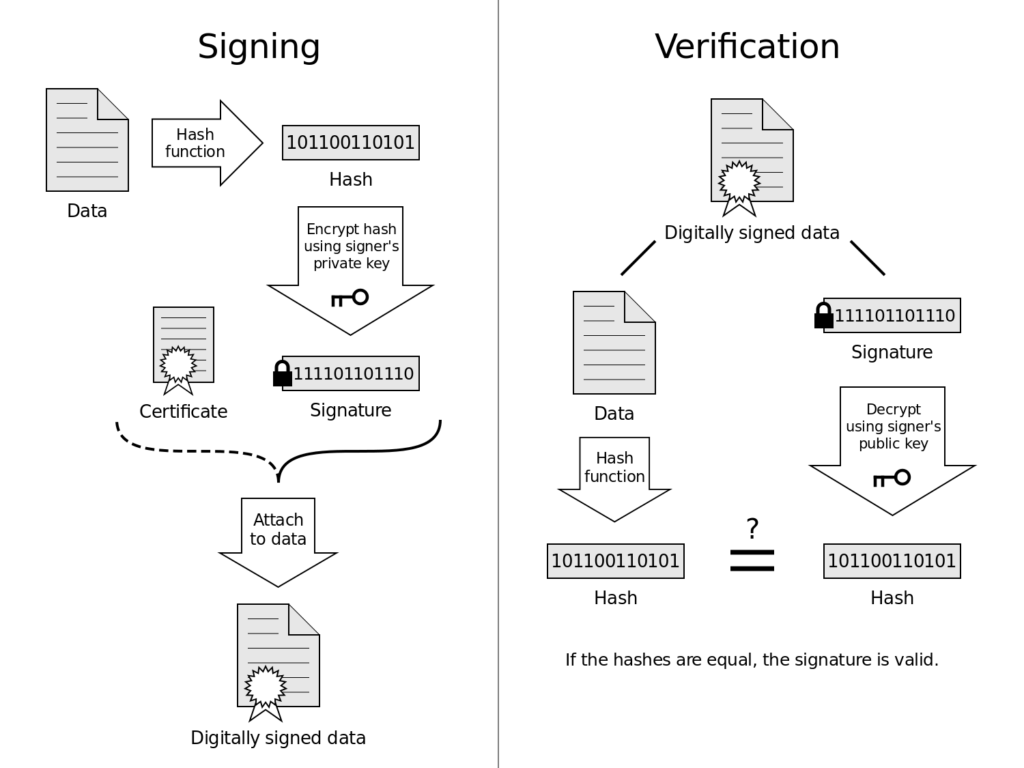

# Code

## Unhashed

In [19]:
def rsa_ds_key_creation():
    p = getPrime(128)
    q = getPrime(128)
    N = p * q
    while True:
        e = random.randint(N//4,N-1)
        if(GCD(e, (p-1)*(q-1)) == 1):
            break
    return (p, q), (N, e)

In [21]:
def rsa_ds_sign(D, p, q, N):
    d = inverse(e, (p-1)*(q-1)) #compute private key
    S = pow(D, d, N) #compute signature
    return S

In [27]:
def rsa_ds_verif(D, S,  e, N):
    return pow(S, e, N) == D #verify using public key

In [55]:
D = bytes_to_long(b'secretmessage')

In [56]:
(p, q), (N, e) = rsa_ds_key_creation()

In [57]:
S = rsa_ds_sign(D, p, q, N)
S

54047961741686671827108405664273072679361804373738609616416615952874644784629

In [58]:
rsa_ds_verif(D, S, e, N)

True

## Hashed

In [59]:
bytes_to_long(SHA256.SHA256Hash(b'secret').digest())

19774644322343364210033507226347517504509547448996271814774638767344332546651

In [60]:
def rsa_ds_sign_hashed(D, p, q, N):
    d = inverse(e, (p-1)*(q-1)) #compute private key
    D_hashed = bytes_to_long(SHA256Hash(D).digest()) #hash -> D is bytes
    S = pow(D_hashed, d, N) #compute signature
    return S

def rsa_ds_verif_hashed(D, S,  e, N):
    return pow(S, e, N) == bytes_to_long(SHA256Hash(D).digest()) #verify using public key

In [61]:
D = b'secretmessage'
(p, q), (N, e) = rsa_ds_key_creation()

In [62]:
S = rsa_ds_sign_hashed(D, p, q, N)
S

68536565682466266236471292366197816082055113811296739810837546004144040968909

In [63]:
rsa_ds_verif_hashed(D, S, e, N)

True

# Resources

- https://en.wikipedia.org/wiki/Digital_signature
- http://faculty.uml.edu/klevasseur/math/RSA_Signatures/RSA_Signatures.pdf
- https://www.cs.cornell.edu/courses/cs5430/2015sp/notes/rsa_sign_vs_dec.php